_Importing Required Libraries_

In [68]:
from importlib import reload
import pinn
reload(pinn)

<module 'pinn' from '/Users/ashnadua/Desktop/DPCN/Van-der-Pol-informed-Neural-Networks/pinn.py'>

In [69]:
pip install hampel

Note: you may need to restart the kernel to use updated packages.


In [70]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import keras
import tensorflow as tf
from hampel import hampel
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from matplotlib import pyplot
from numpy import array
import matplotlib.pyplot as plt

### generating vanderpol oscillator data (position and velocity) using range kutta method

In [71]:
from data_gen.vander_poll import rk4


In [72]:
def vanderpol(x, y, mu):
  return (y, mu*(1-x**2)*y - x)

mu = 4  # Parameter for nonlinearity
t_start = 0  # Starting time
t_end = 70  # End time
dt = 0.04  # Time step 
x0 = 1  # Initial position
y0 = 0  # Initial velocity

# Initialize lists for storing data
t = []
x = []
y = []

# Simulate using RK4
t.append(t_start)
x.append(x0)
y.append(y0)

for i in range(int((t_end - t_start) / dt)):
  next_point = rk4(vanderpol, x[-1], y[-1], dt, mu)
  t.append(t[-1] + dt)
  x.append(next_point[0])
  y.append(next_point[1])

print("Time:", t)
print("x:", x)
print("dx/dt:", y)

with open(r'.\Dataset\van_der_pol_intermittency.dat', "wb") as file:
    # Your code for writing to the file goes here
  for i in range(len(t)):
    velocity_bytes = str(y[i]).encode() + b' '  # Add space after converting to bytes
    position_bytes = str(x[i]).encode() + b'\n'  # Add newline after converting to bytes
    file.write(velocity_bytes)
    file.write(position_bytes)

Time: [0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24000000000000002, 0.28, 0.32, 0.36, 0.39999999999999997, 0.43999999999999995, 0.4799999999999999, 0.5199999999999999, 0.5599999999999999, 0.6, 0.64, 0.68, 0.7200000000000001, 0.7600000000000001, 0.8000000000000002, 0.8400000000000002, 0.8800000000000002, 0.9200000000000003, 0.9600000000000003, 1.0000000000000002, 1.0400000000000003, 1.0800000000000003, 1.1200000000000003, 1.1600000000000004, 1.2000000000000004, 1.2400000000000004, 1.2800000000000005, 1.3200000000000005, 1.3600000000000005, 1.4000000000000006, 1.4400000000000006, 1.4800000000000006, 1.5200000000000007, 1.5600000000000007, 1.6000000000000008, 1.6400000000000008, 1.6800000000000008, 1.7200000000000009, 1.760000000000001, 1.800000000000001, 1.840000000000001, 1.880000000000001, 1.920000000000001, 1.960000000000001, 2.000000000000001, 2.040000000000001, 2.080000000000001, 2.120000000000001, 2.160000000000001, 2.200000000000001, 2.240000000000001, 2.280000000000001, 2.320000000000001

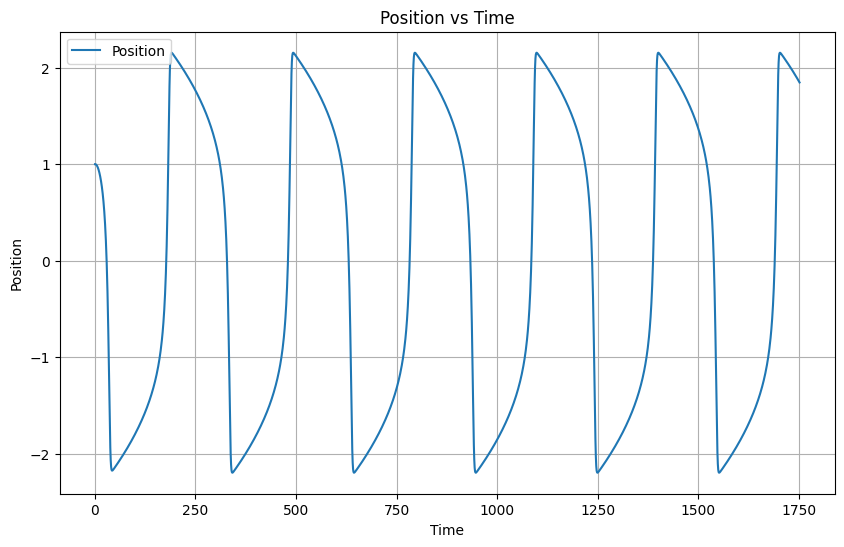

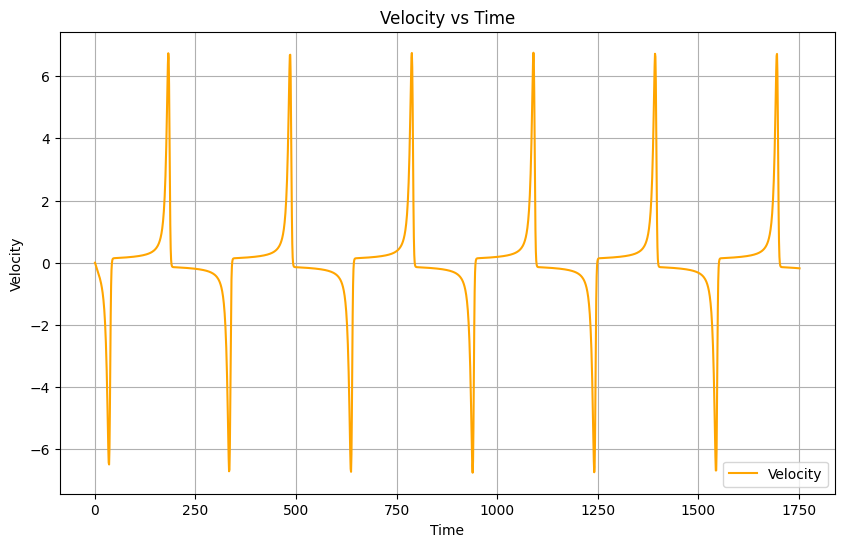

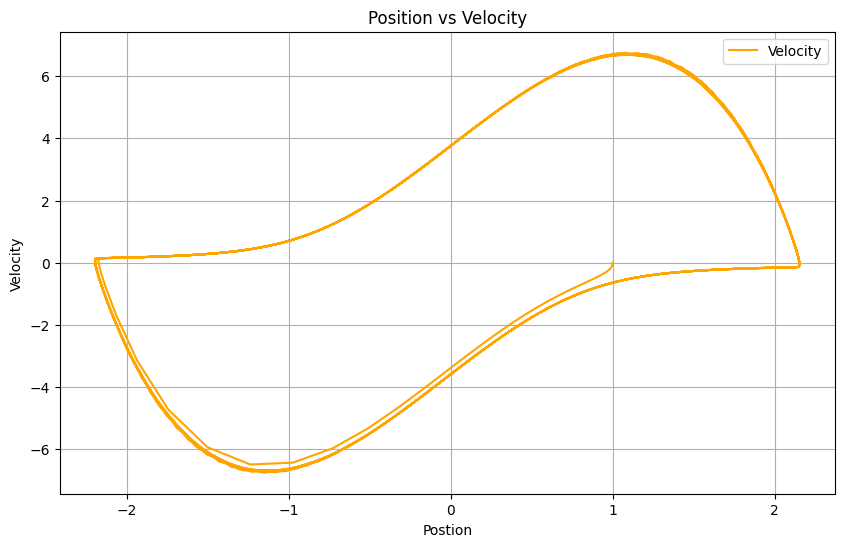

In [73]:
data = np.loadtxt(r'.\Dataset\van_der_pol_intermittency.dat')
# Extract columns from the data
time= np.arange(1,data.shape[0]+1)
velocity = data[:, 0]
position = data[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(time, position, label="Position")
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Position vs Time")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time, velocity, label="Velocity", color="orange")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("Velocity vs Time")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(position, velocity, label="Velocity", color="orange")
plt.xlabel("Postion")
plt.ylabel("Velocity")
plt.title("Position vs Velocity")
plt.legend()
plt.grid(True)
plt.show()


## Pretraining

The `van_der_pol_intermittency.dat` feeds the model with the dynamics of the Van der Pol Oscillator

In [74]:
data1 = np.genfromtxt(r'./Dataset/van_der_pol_intermittency.dat')
training_set1 = pd.DataFrame(data1).reset_index(drop=True)
training_set1 = training_set1.iloc[:,1]

In [86]:
data2 = np.genfromtxt(r'./Dataset/shm_data.dat')
training_set2 = pd.DataFrame(data2).reset_index(drop=True)
training_set2 = training_set2.iloc[:,1]

In [75]:
from pinn import PINN

_Calculating the value of_ $\frac{dx}{dt}$, _and_ $\frac{d^2x}{dt^2}$

In [76]:
vpn = PINN(4,training_set1)
print("training set size",training_set1.shape)
print("gradient_t shape",vpn.gradient_t.shape)
print("gradient_tt shape",vpn.gradient_tt.shape)

training set size (1751,)
gradient_t shape (1750,)
gradient_tt shape (1749,)


## Loading Datasets

_दिल्ली WIND SPEED_

In [77]:
vpn.load_data("./Dataset/delhi.csv",3)
print(vpn.training_set.shape)

(1452,)


In [78]:
files = ["./Dataset/delhi.csv", "./Dataset/elnino.csv", "./Dataset/eq.csv", "./Dataset/madrid.csv", "./Dataset/philippines.csv"]
column_numbers = [3, 4, 1, 0, 0]

In [79]:
import joblib

Training Set Size:  (1751,)
gradient_t shape:  (1750,)
gradient_tt shape:  (1749,)
(1452,)
Shape of trainX: (1407, 1, 37)
Shape of trainY: (1407, 30)
Shape of forecastX: (1, 1, 37)
SHM
Epoch 1/100
18/18 [==============================] - 2s 21ms/step - loss: 58.7986 - val_loss: 59.4296
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 53.7023 - val_loss: 55.5846
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 51.0478 - val_loss: 53.0933
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 48.8511 - val_loss: 50.4045
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 46.7374 - val_loss: 48.6287
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 45.2888 - val_loss: 46.9866
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 43.7975 - val_loss: 45.3198
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 42.3730 - val_loss: 43.7733
Epoch 

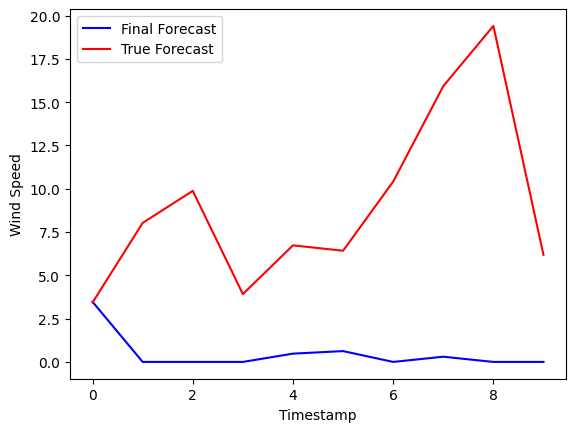

Training Set Size:  (1751,)
gradient_t shape:  (1750,)
gradient_tt shape:  (1749,)
(1624,)
Shape of trainX: (1579, 1, 37)
Shape of trainY: (1579, 30)
Shape of forecastX: (1, 1, 37)
SHM
Epoch 1/100
20/20 [==============================] - 2s 20ms/step - loss: 0.6785 - val_loss: 0.8161
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5761 - val_loss: 0.7308
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5238 - val_loss: 0.6670
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4766 - val_loss: 0.6084
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4390 - val_loss: 0.5577
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4030 - val_loss: 0.5209
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3752 - val_loss: 0.4793
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3451 - val_loss: 0.4512
Epoch 9/100
20/20 [===

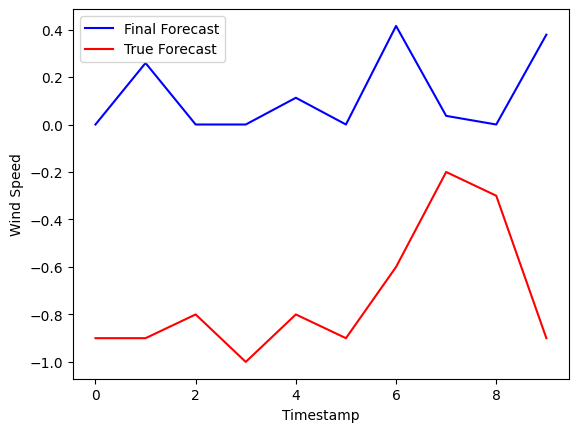

Training Set Size:  (1751,)
gradient_t shape:  (1750,)
gradient_tt shape:  (1749,)
(6564,)
Shape of trainX: (1704, 1, 37)
Shape of trainY: (1704, 30)
Shape of forecastX: (1, 1, 37)
SHM
Epoch 1/100
22/22 [==============================] - 2s 17ms/step - loss: 1437.0209 - val_loss: 1357.1140
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 1369.4338 - val_loss: 1325.8507
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 1336.4452 - val_loss: 1293.9196
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 1311.0001 - val_loss: 1274.2120
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 1291.6388 - val_loss: 1255.6946
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 1273.3630 - val_loss: 1238.1382
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 1255.9841 - val_loss: 1221.4038
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 1239.3

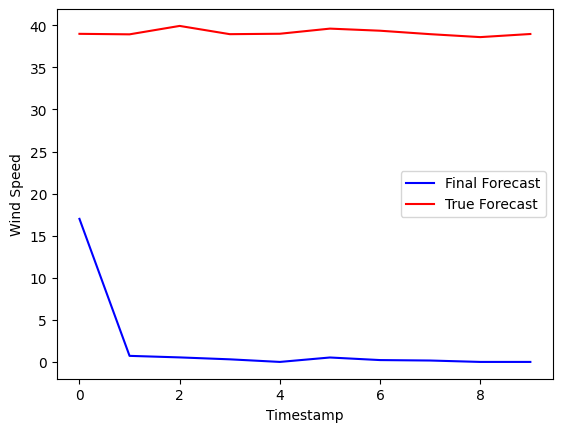

Training Set Size:  (1751,)
gradient_t shape:  (1750,)
gradient_tt shape:  (1749,)
(2437,)
Shape of trainX: (1704, 1, 37)
Shape of trainY: (1704, 30)
Shape of forecastX: (1, 1, 37)
SHM
Epoch 1/100
22/22 [==============================] - 2s 17ms/step - loss: 3191.8826 - val_loss: 2772.0667
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 3071.5049 - val_loss: 2732.1797
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 3017.7976 - val_loss: 2679.0107
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 2962.1626 - val_loss: 2615.3459
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 2907.0093 - val_loss: 2579.3640
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 2869.8569 - val_loss: 2545.7483
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 2834.9475 - val_loss: 2514.0415
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 2801.8

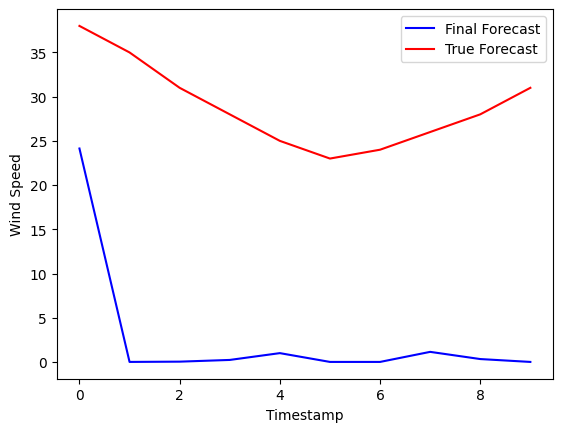

Training Set Size:  (1751,)
gradient_t shape:  (1750,)
gradient_tt shape:  (1749,)
(1478,)
Shape of trainX: (1433, 1, 37)
Shape of trainY: (1433, 30)
Shape of forecastX: (1, 1, 37)
SHM
Epoch 1/100
18/18 [==============================] - 2s 21ms/step - loss: 433.3074 - val_loss: 618.5288
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 391.2412 - val_loss: 590.9634
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 379.7082 - val_loss: 578.9942
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 372.1746 - val_loss: 568.6344
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 365.7076 - val_loss: 559.5977
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 360.0166 - val_loss: 551.5606
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 354.8837 - val_loss: 544.3253
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 350.1540 - val_loss:

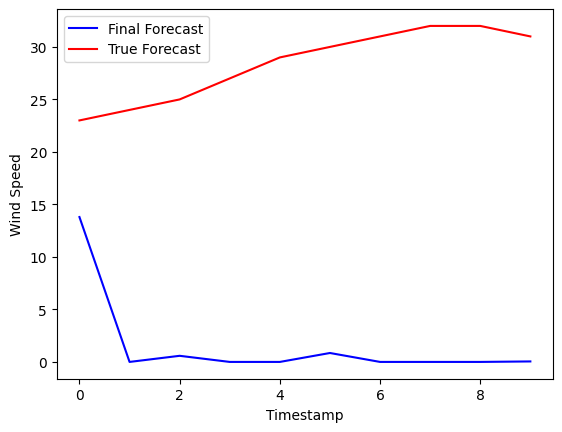

In [87]:
for file, column in zip(files, column_numbers):
    vpn = pinn.PINN(4,training_set2)
    print("Training Set Size: ",training_set1.shape)
    print("gradient_t shape: ",vpn.gradient_t.shape)
    print("gradient_tt shape: ",vpn.gradient_tt.shape)

    vpn.load_data(file, column)
    print(vpn.training_set.shape)

    vpn.convert(offset=30,in_val=35,out_val=10)
    print("Shape of trainX:",vpn.trainX.shape)
    print("Shape of trainY:",vpn.trainy.shape)
    print("Shape of forecastX:",vpn.forecastX.shape)

    vpn.train_model(type="SHM")
    error = vpn.evaluate_model()

    final_forecast = vpn.final_forecast
    print("Predicted Forecast:")
    print(final_forecast)
    print("Shape of final_forecast:", final_forecast.shape)

    true_forecast = vpn.true_forecast
    print("True Forecast:")
    print(true_forecast)
    print("Shape of true_forecast: ",true_forecast.shape)

    print("Error: ", error)
    name = file.split("/")[-1].split(".")[0]
    name += "shm"
    vpn.plot_forecasts(name=name, final_forecast=final_forecast,true_forecast=true_forecast)

    joblib.dump(vpn, f'model_{name}.pkl')
    with open(f'error_{name}.txt', 'w') as f:
        f.write(str(error))


This is for VPINN

Training Set Size:  (1751,)
gradient_t shape:  (1750,)
gradient_tt shape:  (1749,)
(1452,)
Shape of trainX: (1407, 1, 37)
Shape of trainY: (1407, 30)
Shape of forecastX: (1, 1, 37)
VPINN
Epoch 1/100
18/18 [==============================] - 2s 22ms/step - loss: 57.5281 - val_loss: 48.5253
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 41.7415 - val_loss: 37.9471
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 35.5943 - val_loss: 32.5736
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 31.7980 - val_loss: 27.9229
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 28.7371 - val_loss: 24.8323
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 26.8263 - val_loss: 22.5914
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 25.2452 - val_loss: 21.2137
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 23.8773 - val_loss: 21.1690
Epoc

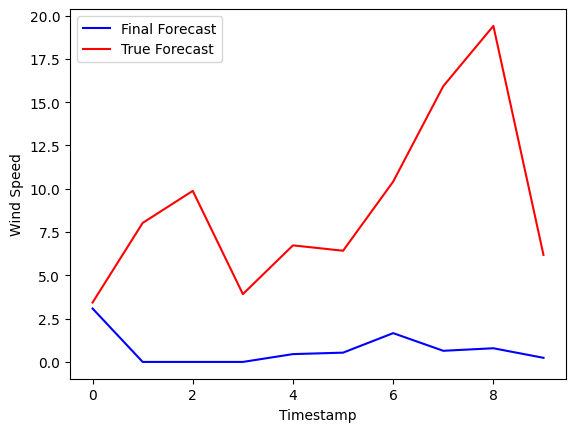

Training Set Size:  (1751,)
gradient_t shape:  (1750,)
gradient_tt shape:  (1749,)
(1624,)
Shape of trainX: (1579, 1, 37)
Shape of trainY: (1579, 30)
Shape of forecastX: (1, 1, 37)
VPINN
Epoch 1/100
20/20 [==============================] - 2s 20ms/step - loss: 0.6290 - val_loss: 0.6179
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4170 - val_loss: 0.4295
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3075 - val_loss: 0.2976
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2377 - val_loss: 0.2194
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1942 - val_loss: 0.2936
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1868 - val_loss: 1.5896
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.9682 - val_loss: 0.5737
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3111 - val_loss: 0.5199
Epoch 9/100
20/20 [=

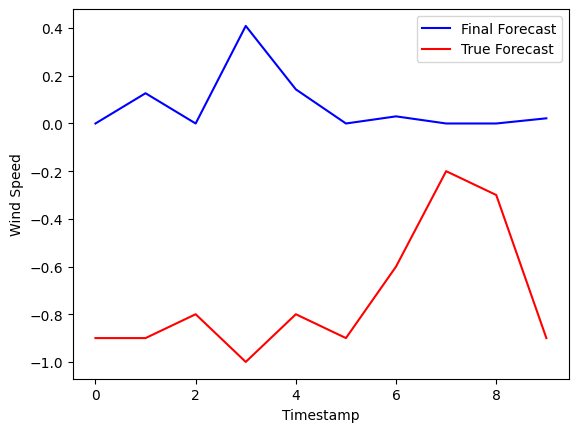

Training Set Size:  (1751,)
gradient_t shape:  (1750,)
gradient_tt shape:  (1749,)
(6564,)
Shape of trainX: (1704, 1, 37)
Shape of trainY: (1704, 30)
Shape of forecastX: (1, 1, 37)
VPINN
Epoch 1/100
22/22 [==============================] - 2s 21ms/step - loss: 1421.8767 - val_loss: 1306.4266
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 1321.2192 - val_loss: 1281.1432
Epoch 3/100
22/22 [==============================] - 0s 6ms/step - loss: 1290.6705 - val_loss: 1241.4531
Epoch 4/100
22/22 [==============================] - 0s 8ms/step - loss: 1256.1804 - val_loss: 1216.3407
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 1230.4154 - val_loss: 1191.4597
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 1205.7576 - val_loss: 1167.4211
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 1181.7683 - val_loss: 1143.9789
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 1158

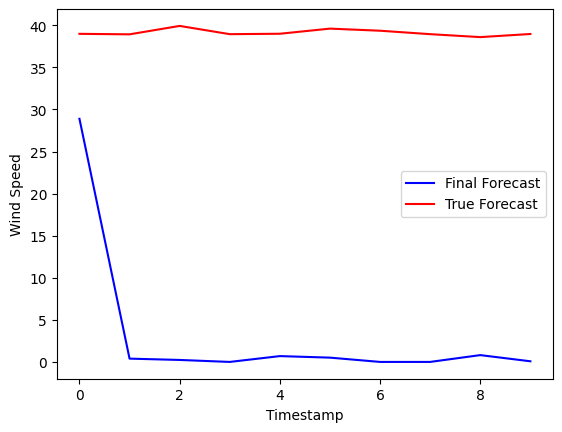

Training Set Size:  (1751,)
gradient_t shape:  (1750,)
gradient_tt shape:  (1749,)
(2437,)
Shape of trainX: (1704, 1, 37)
Shape of trainY: (1704, 30)
Shape of forecastX: (1, 1, 37)
VPINN
Epoch 1/100
22/22 [==============================] - 2s 18ms/step - loss: 3203.1250 - val_loss: 2782.4890
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 3055.7319 - val_loss: 2699.0908
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 2979.0405 - val_loss: 2634.5247
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 2925.7002 - val_loss: 2589.6245
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 2879.8035 - val_loss: 2546.9941
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 2835.7234 - val_loss: 2505.8394
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 2792.9436 - val_loss: 2465.7761
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 2751

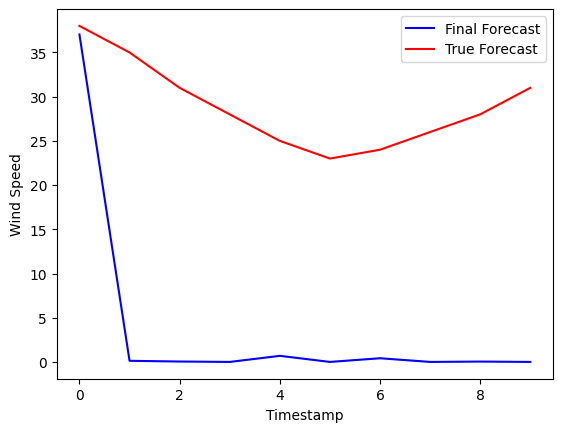

Training Set Size:  (1751,)
gradient_t shape:  (1750,)
gradient_tt shape:  (1749,)
(1478,)
Shape of trainX: (1433, 1, 37)
Shape of trainY: (1433, 30)
Shape of forecastX: (1, 1, 37)
VPINN
Epoch 1/100
18/18 [==============================] - 2s 24ms/step - loss: 480.4468 - val_loss: 690.5219
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 424.6128 - val_loss: 626.6373
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 391.1761 - val_loss: 593.3574
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 368.5478 - val_loss: 571.9372
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 354.0797 - val_loss: 554.6454
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 340.8940 - val_loss: 538.3893
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 328.4901 - val_loss: 522.9456
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 316.7046 - val_los

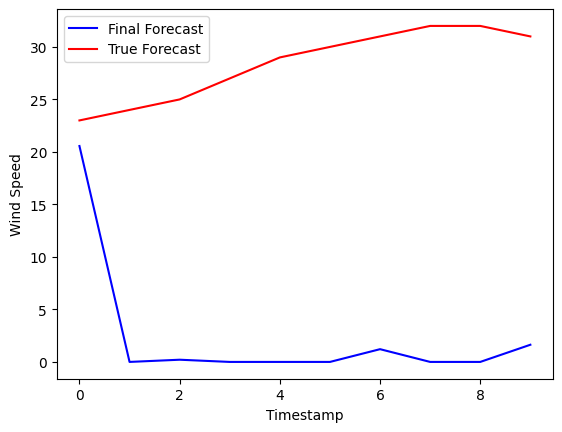

In [81]:
for file, column in zip(files, column_numbers):
    vpn = pinn.PINN(4,training_set1)
    print("Training Set Size: ",training_set1.shape)
    print("gradient_t shape: ",vpn.gradient_t.shape)
    print("gradient_tt shape: ",vpn.gradient_tt.shape)

    vpn.load_data(file, column)
    print(vpn.training_set.shape)

    vpn.convert(offset=30,in_val=35,out_val=10)
    print("Shape of trainX:",vpn.trainX.shape)
    print("Shape of trainY:",vpn.trainy.shape)
    print("Shape of forecastX:",vpn.forecastX.shape)

    vpn.train_model(type="VPINN")
    error = vpn.evaluate_model()

    final_forecast = vpn.final_forecast
    print("Predicted Forecast:")
    print(final_forecast)
    print("Shape of final_forecast:", final_forecast.shape)

    true_forecast = vpn.true_forecast
    print("True Forecast:")
    print(true_forecast)
    print("Shape of true_forecast: ",true_forecast.shape)

    print("Error: ", error)
    name = file.split("/")[-1].split(".")[0]

    vpn.plot_forecasts(name=name, final_forecast=final_forecast,true_forecast=true_forecast)

    joblib.dump(vpn, f'model_{name}.pkl')
    with open(f'error_{name}.txt', 'w') as f:
        f.write(str(error))


In [ ]:
vpn.convert(offset=30,in_val=35,out_val=10)
print("shape of trainX",vpn.trainX.shape)
print("shape of trainY",vpn.trainy.shape)
print("shape of forecastX",vpn.forecastX.shape)

shape of trainX (1433, 1, 37)
shape of trainY (1433, 30)
shape of forecastX (1, 1, 37)


In [ ]:
vpn.train_model(type="VPINN")

VPINN
Epoch 1/100
18/18 [==============================] - 2s 22ms/step - loss: 443.2410 - val_loss: 622.6942
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 386.7396 - val_loss: 589.0427
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 366.4725 - val_loss: 570.1922
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 352.4001 - val_loss: 545.8929
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 332.2906 - val_loss: 525.5464
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 318.3022 - val_loss: 509.4203
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 305.8079 - val_loss: 493.7260
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 294.1508 - val_loss: 479.0005
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 283.0257 - val_loss: 464.7782
Epoch 10/100
18/18 [==============================] - 0s 3ms/step 

In [ ]:
vpn.evaluate_model()

1/1 [==============================] - 0s 271ms/step


26.087402629852296

In [ ]:
final_forecast = vpn.final_forecast
print(final_forecast)
print(final_forecast.shape)


[[21.327967    0.          0.          0.          0.6449527   0.52164143
   0.          0.          0.63141286  0.        ]]
(1, 10)


In [ ]:
true_forecast = vpn.true_forecast
print(true_forecast)
print(true_forecast.shape)

[[23. 24. 25. 27. 29. 30. 31. 32. 32. 31.]]
(1, 10)


In [ ]:
error = vpn.evaluate_model()
print(error)

1/1 [==============================] - 0s 16ms/step
26.087402629852296


In [84]:
name = 0


Plot will not be printed


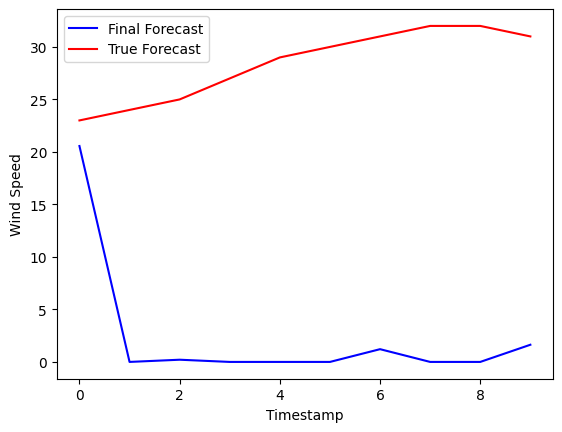

In [85]:
vpn.plot_forecasts(name=name, final_forecast=final_forecast,true_forecast=true_forecast)